<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/machine-learning/_000_hello_machine/_000_basic/_003_tensorflow_cuk_edu/_002_2_ml/_002_weather_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기상청 날씨 데이터 분석하기

## 데이터 불러오기

- 컬럼 설정
- 사람을 위한 월 시작 row 제거
  - 12월 31일 -> | start: 201912 | -> 1월 1일

In [1]:
import pandas as pd
import numpy as np
root_path = 'https://raw.githubusercontent.com/wiv33/A-Learning-python/master/machine-learning/_000_hello_machine/_000_basic/_003_tensorflow_cuk_edu/_002_2_ml/data'

class WeatherAnalysis:
  def __init__(self, path: str):
    """
    :path 
      common root path

    """
    self.df_precipitation = pd.read_csv(path + '/precipitation_201910_202009.csv')
    self.df_precipitation.columns = ['day', 'hour', 'precipitation']
    self.df_precipitation.dropna(axis=0, inplace=True)

    self.df_direction_of_the_wind = pd.read_csv(path + '/direction_of_the_wind_201910_202009.csv')
    self.df_direction_of_the_wind.columns = ['day', 'hour', 'wind']
    self.df_direction_of_the_wind.dropna(axis=0, inplace=True)

    self.df_precipitation_shape = pd.read_csv(path + '/precipitation_shape_201910_202009.csv')
    self.df_precipitation_shape.columns = ['day', 'hour', 'precipitation_shape']
    self.df_precipitation_shape.dropna(axis=0, inplace=True)

    self.df_temperature = pd.read_csv(path + '/temperature_201910_202009.csv')
    self.df_temperature.columns = ['day', 'hour', 'temperature'] 
    self.df_temperature.dropna(axis=0, inplace=True)

    self.df_humidity = pd.read_csv(path + '/humidity_201910_202009.csv')
    self.df_humidity.columns = ['day', 'hour', 'humidity']
    self.df_humidity.dropna(axis=0, inplace=True)

    self.df_wind_speed = pd.read_csv(path + '/%EC%9B%94%EA%B3%A1%EC%A0%9C1%EB%8F%99_%ED%92%8D%EC%86%8D_wind_speed_201910_202009.csv')
    self.df_wind_speed.columns = ['day', 'hour', 'wind_speed']
    self.df_wind_speed.dropna(axis=0, inplace=True)
    
  def make_df(self) -> pd.DataFrame:
    """
    return pd.DataFrame
    shape: (8784, 10)
    """

    # 날짜 형식의 데이터를 수동적으로 추가
    df_day_idx = pd.date_range('2019-10-01', periods=366)
    dates = [[str(day).split("T")[0]] * 24 for day in df_day_idx.values]

    self.df_precipitation.insert(0, column='date', value=np.array(dates).flatten())
    self.df = self.df_precipitation.iloc[:, [0, 2]].copy()

    # 각각의 공공데이터를 하나의 DataFrame으로 합쳐 반환한다.
    self.df['day'] = self.df_precipitation.day
    self.df['hour'] = self.df_precipitation.hour
    self.df['precipitation'] = self.df_precipitation.precipitation
    self.df['precipitation_shape'] = self.df_precipitation_shape['precipitation_shape']
    self.df['temperature'] = self.df_temperature['temperature']
    self.df['humidity'] = self.df_humidity.humidity
    self.df['wind'] = self.df_direction_of_the_wind.wind
    self.df['wind_speed'] = self.df_wind_speed.wind_speed
    self.df['y_m'] = self.df['date'].apply(lambda x: "{}-{}".format(x.split("-")[0], x.split("-")[1]))

    # 애널리틱스 객체는 원본 데이터를 가지고 있게 한다.
    return self.df.copy()

wa = WeatherAnalysis(root_path)
df = wa.make_df()
df.shape

(8784, 10)

In [2]:
df.isnull().sum()

date                   0
hour                   0
day                    0
precipitation          0
precipitation_shape    0
temperature            0
humidity               0
wind                   0
wind_speed             0
y_m                    0
dtype: int64

In [3]:
df[df.hour.isnull()]

,date,hour,day,precipitation,precipitation_shape,temperature,humidity,wind,wind_speed,y_m


nan row 확인

In [4]:
df_test = pd.read_csv(root_path + '/temperature_201910_202009.csv')
# df_test.iloc[3318:3340, :]

In [5]:
df_test2 = pd.read_csv(root_path + '/precipitation_shape_201910_202009.csv')
# df_test2.iloc[3318:3340, :]

In [6]:
df_test3 = pd.read_csv(root_path + '/precipitation_201910_202009.csv')
# df_test3.iloc[3318:3340, :]

In [7]:
df_test4 = pd.read_csv(root_path + '/precipitation_201910_202009.csv')
df_test4.columns = ['day', 'hour', 'precipitation']
df_test4.head()

,day,hour,precipitation
0,1,0.0,0.0
1,1,100.0,0.0
2,1,200.0,0.0
3,1,300.0,0.0
4,1,400.0,0.0


In [8]:
df_date_test4 = pd.date_range('2019-10-01', periods=366)
df_date_test4

DatetimeIndex(['2019-10-01', '2019-10-02', '2019-10-03', '2019-10-04',
               '2019-10-05', '2019-10-06', '2019-10-07', '2019-10-08',
               '2019-10-09', '2019-10-10',
               ...
               '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24',
               '2020-09-25', '2020-09-26', '2020-09-27', '2020-09-28',
               '2020-09-29', '2020-09-30'],
              dtype='datetime64[ns]', length=366, freq='D')

nan 형태 확인 후 제거

In [9]:
del df_test
del df_test2
del df_test3
del df_date_test4

### 다섯 개의 DataFrame shape 확인하기

In [10]:
wa.df_direction_of_the_wind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 0 to 8794
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     8784 non-null   object 
 1   hour    8784 non-null   float64
 2   wind    8784 non-null   float64
dtypes: float64(2), object(1)
memory usage: 274.5+ KB


In [11]:
wa.df_precipitation_shape.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 0 to 8794
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   day                  8784 non-null   object 
 1   hour                 8784 non-null   float64
 2   precipitation_shape  8784 non-null   float64
dtypes: float64(2), object(1)
memory usage: 274.5+ KB


In [12]:
wa.df_humidity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 0 to 8794
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   day       8784 non-null   object 
 1   hour      8784 non-null   float64
 2   humidity  8784 non-null   float64
dtypes: float64(2), object(1)
memory usage: 274.5+ KB


In [13]:
wa.df_temperature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 0 to 8794
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          8784 non-null   object 
 1   hour         8784 non-null   float64
 2   temperature  8784 non-null   float64
dtypes: float64(2), object(1)
memory usage: 274.5+ KB


## 시간 데이터 타입 변환

- 기존 24시의 표현 변경

  0.0, 100.0, 200.0

  0, 1, 2, 3

- ~~day int로 변경~~
- day를 datetime 형식으로 변경.

시각화할 때 구분이 가지 않음.


In [14]:
def hour_regulation(hour: float):
  return int(hour / 100)

In [15]:
df.hour = df.hour.apply(hour_regulation)
df.day = df.day.astype(np.int)
df.precipitation_shape = df.precipitation_shape.astype(np.int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 0 to 8794
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 8784 non-null   object 
 1   hour                 8784 non-null   int64  
 2   day                  8784 non-null   int64  
 3   precipitation        8784 non-null   float64
 4   precipitation_shape  8784 non-null   int64  
 5   temperature          8784 non-null   float64
 6   humidity             8784 non-null   float64
 7   wind                 8784 non-null   float64
 8   wind_speed           8784 non-null   float64
 9   y_m                  8784 non-null   object 
dtypes: float64(5), int64(3), object(2)
memory usage: 754.9+ KB


In [16]:
df.describe()

,hour,day,precipitation,precipitation_shape,temperature,humidity,wind,wind_speed
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,11.500000,15.756831,0.195924,0.061589,14.031364,64.886043,204.206398,1.899841
std,6.922581,8.812031,1.324470,0.261299,9.986910,20.409870,120.910504,1.220649
min,0.000000,1.000000,-1.000000,-1.000000,-50.000000,-1.000000,-1.000000,-1.000000
25%,5.750000,8.000000,0.000000,0.000000,5.700000,50.000000,82.000000,1.000000
50%,11.500000,16.000000,0.000000,0.000000,14.500000,65.000000,239.000000,1.600000
75%,17.250000,23.000000,0.000000,0.000000,22.700001,82.000000,314.000000,2.600000
max,23.000000,31.000000,43.000000,3.000000,36.700001,97.000000,360.000000,12.800000


### 이상 데이터 확인

강수, 강수 형태, 습도, 풍향, 풍속의 최소 값이 `-1`이고

기온이 `-50도`인 것은 정규화가 필요하다고 판단.

In [17]:
df[df['temperature'] == -50].index

Int64Index([514, 1057, 2271, 3468, 3475, 3481, 4183, 4661, 5487], dtype='int64')

- 이상 데이터의 인덱스 확인

### 이상 데이터 정규화

- 습도와 기온은 +-2일 값의 평균으로 적용
- 나머지 값은 0으로 적용

In [18]:
for x in df[df['wind'] <= -1].index:
  seq = int(x)
  df['temperature'][seq] = np.mean((df.iloc[seq-2:seq, 4], df.iloc[seq+1:seq+3, 4]))
  df['humidity'][seq] = np.mean((df.iloc[seq-2:seq, 5], df.iloc[seq+1:seq+3, 5]))
  df['wind_speed'][seq] = 0.0
  df['precipitation_shape'][seq] = 0.0
  df['precipitation'][seq] = 0.0
  df['wind'][seq] = 0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [19]:
df[df['humidity'] <= 10.0]

,date,hour,day,precipitation,precipitation_shape,temperature,humidity,wind,wind_speed,y_m
1057,2019-11-14,0,14,0.0,0,-0.25,1.8875,0.0,0.0,2019-11
2271,2020-01-03,12,3,0.0,0,0.00,-0.7500,0.0,0.0,2020-01
3468,2020-02-22,8,22,0.0,0,0.00,1.7500,0.0,0.0,2020-02
3475,2020-02-22,15,22,0.0,0,-0.25,-12.1500,0.0,0.0,2020-02
3481,2020-02-22,21,22,0.0,0,0.00,4.5250,0.0,0.0,2020-02
3504,2020-02-23,20,23,0.0,0,0.00,6.1000,0.0,0.0,2020-02
5291,2020-05-08,4,8,0.0,0,26.10,10.0000,136.0,2.5,2020-05


In [20]:
df[df['temperature'] <= -50]

,date,hour,day,precipitation,precipitation_shape,temperature,humidity,wind,wind_speed,y_m


In [21]:
df.iloc[1055: 1057, :]

,date,hour,day,precipitation,precipitation_shape,temperature,humidity,wind,wind_speed,y_m
1056,2019-11-13,23,13,0.0,0,0.40,24.0000,2.0,3.2,2019-11
1057,2019-11-14,0,14,0.0,0,-0.25,1.8875,0.0,0.0,2019-11


In [22]:
df[df['wind'] <= -1]

,date,hour,day,precipitation,precipitation_shape,temperature,humidity,wind,wind_speed,y_m


In [23]:
df.describe()

,hour,day,precipitation,precipitation_shape,temperature,humidity,wind,wind_speed
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,11.500000,15.756831,0.196949,0.062614,14.082263,64.886152,204.207536,1.900979
std,6.922581,8.812031,1.323931,0.259086,9.784929,20.398089,120.908576,1.218408
min,0.000000,1.000000,0.000000,0.000000,-10.900000,-12.150000,0.000000,0.000000
25%,5.750000,8.000000,0.000000,0.000000,5.700000,50.000000,82.000000,1.000000
50%,11.500000,16.000000,0.000000,0.000000,14.500000,65.000000,239.000000,1.600000
75%,17.250000,23.000000,0.000000,0.000000,22.700001,82.000000,314.000000,2.600000
max,23.000000,31.000000,43.000000,3.000000,36.700001,97.000000,360.000000,12.800000


# 시각화

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## 시간에 따른 기온의 변화

In [25]:
df.head(25)

,date,hour,day,precipitation,precipitation_shape,temperature,humidity,wind,wind_speed,y_m
0,2019-10-01,0,1,0.0,0,23.900000,63.0,29.0,0.8,2019-10
1,2019-10-01,1,1,0.0,0,25.400000,60.0,183.0,1.6,2019-10
2,2019-10-01,2,1,0.0,0,26.799999,56.0,122.0,1.6,2019-10
3,2019-10-01,3,1,0.0,0,26.799999,57.0,64.0,1.9,2019-10
4,2019-10-01,4,1,0.0,0,27.400000,59.0,127.0,1.5,2019-10
5,2019-10-01,5,1,0.0,0,27.200001,59.0,63.0,1.6,2019-10
6,2019-10-01,6,1,0.0,0,26.700001,65.0,83.0,2.1,2019-10
7,2019-10-01,7,1,0.0,0,26.799999,66.0,77.0,1.1,2019-10
8,2019-10-01,8,1,0.0,0,26.000000,70.0,121.0,1.9,2019-10
9,2019-10-01,9,1,0.0,0,25.600000,74.0,117.0,1.4,2019-10


In [26]:
df.tail()

,date,hour,day,precipitation,precipitation_shape,temperature,humidity,wind,wind_speed,y_m
8790,2020-09-30,19,30,0.0,0,17.000000,75.0,325.0,0.6,2020-09
8791,2020-09-30,20,30,0.0,0,16.900000,77.0,344.0,0.6,2020-09
8792,2020-09-30,21,30,0.0,0,17.400000,72.0,102.0,0.7,2020-09
8793,2020-09-30,22,30,0.0,0,18.100000,70.0,82.0,1.1,2020-09
8794,2020-09-30,23,30,0.0,0,18.799999,68.0,62.0,1.0,2020-09


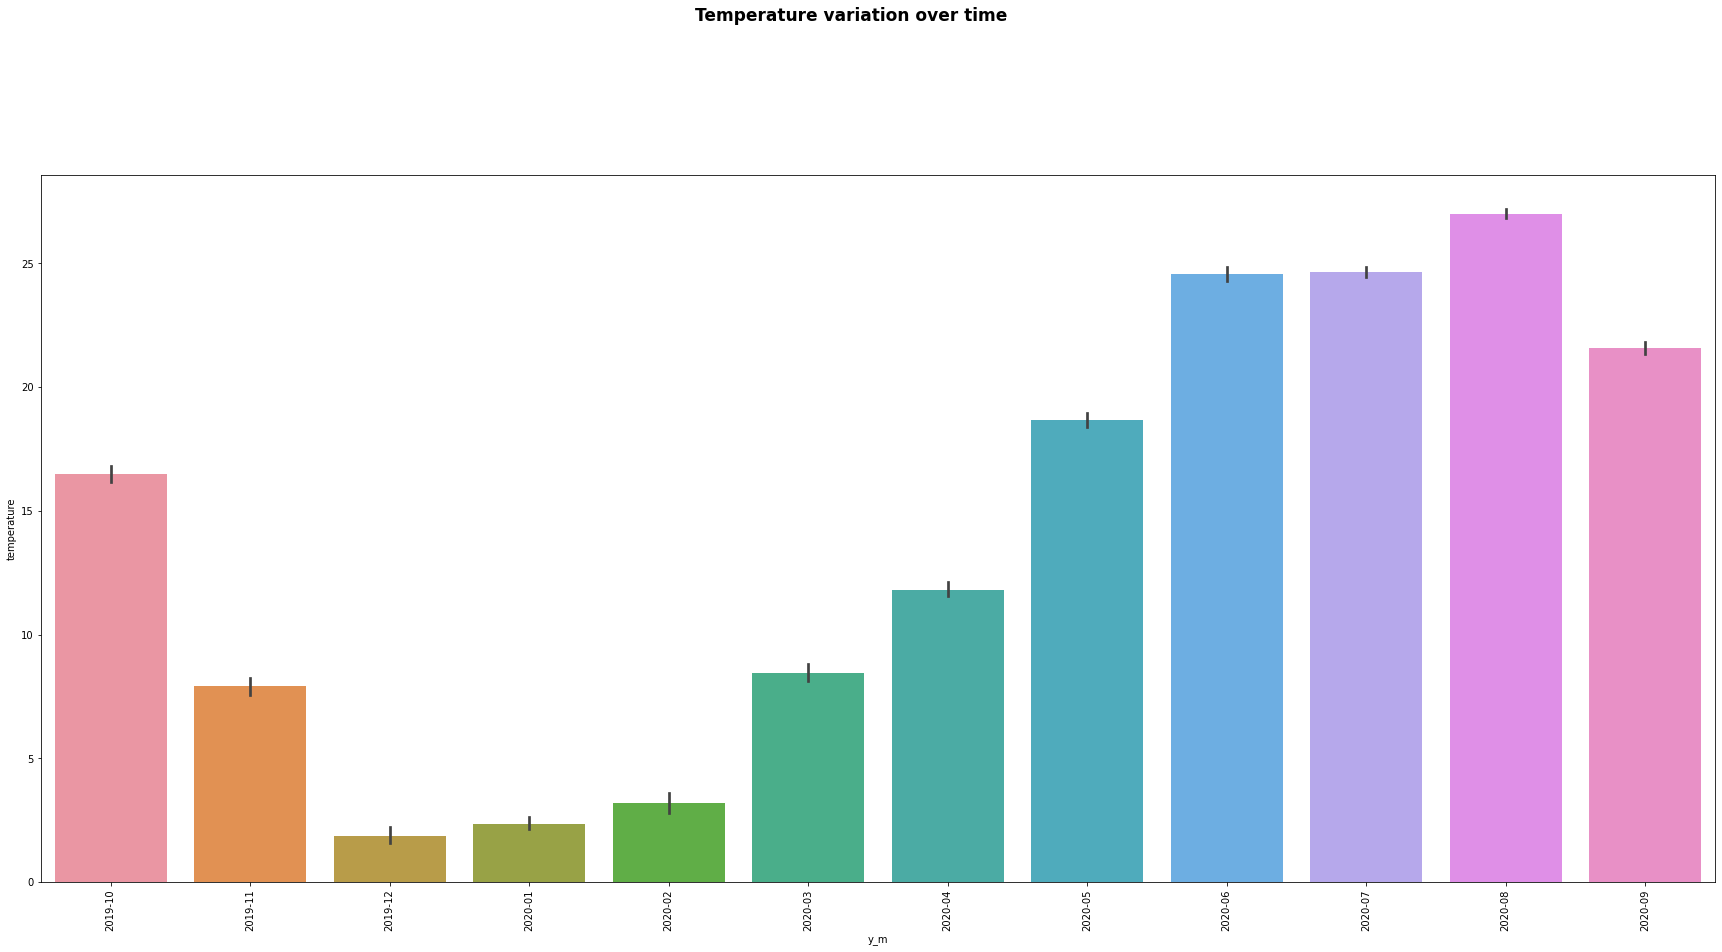

In [27]:
plt.figure(figsize=(30, 13))


plt.xlabel('day')
plt.ylabel('temperature')

# figure title
plt.suptitle('Temperature variation over time',
             fontsize=17,
             fontweight='bold',
             x=.5,
             y=1.06,
             ha='center' # horizontal alignment
             )

plt.xticks(rotation=90)
sns.barplot(x=df['y_m'], y=df['temperature'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


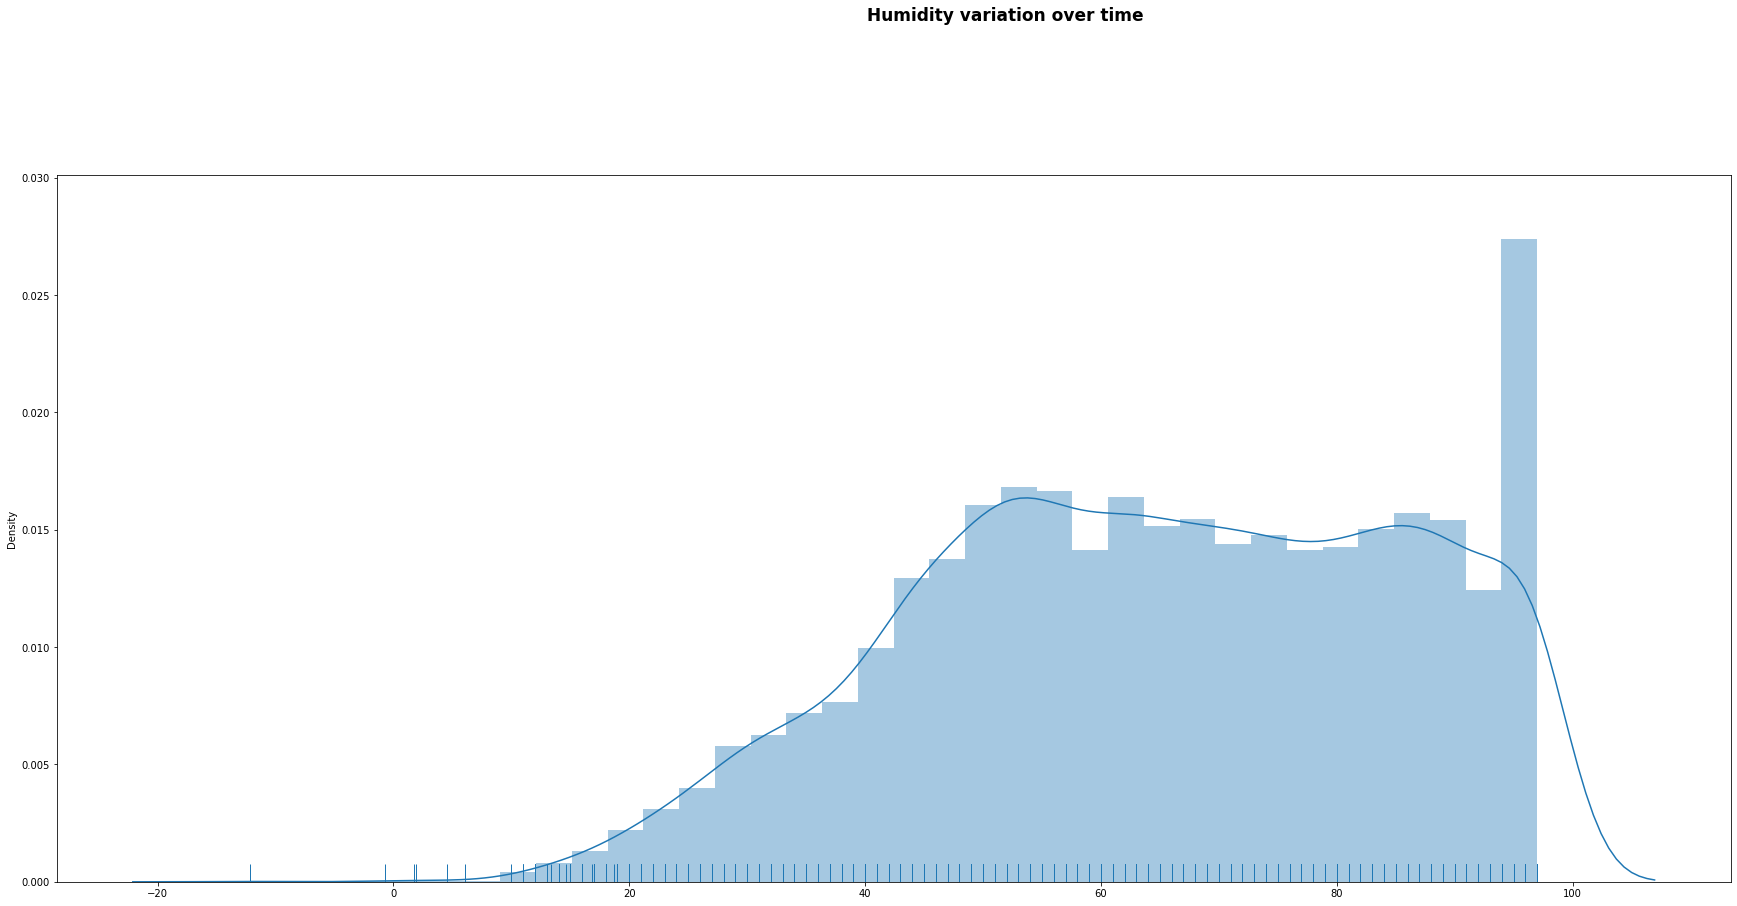

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(30, 13))
plt.suptitle('Humidity variation over time',
             fontsize=17,
             fontweight='bold',
             x=.5,
             y=1.06,
             ha='left'  # Horizontal aligment
             )

sns.distplot(a=df[['humidity']],
             hist=True,
             kde=True,
             rug=True,
             ax=ax
             )

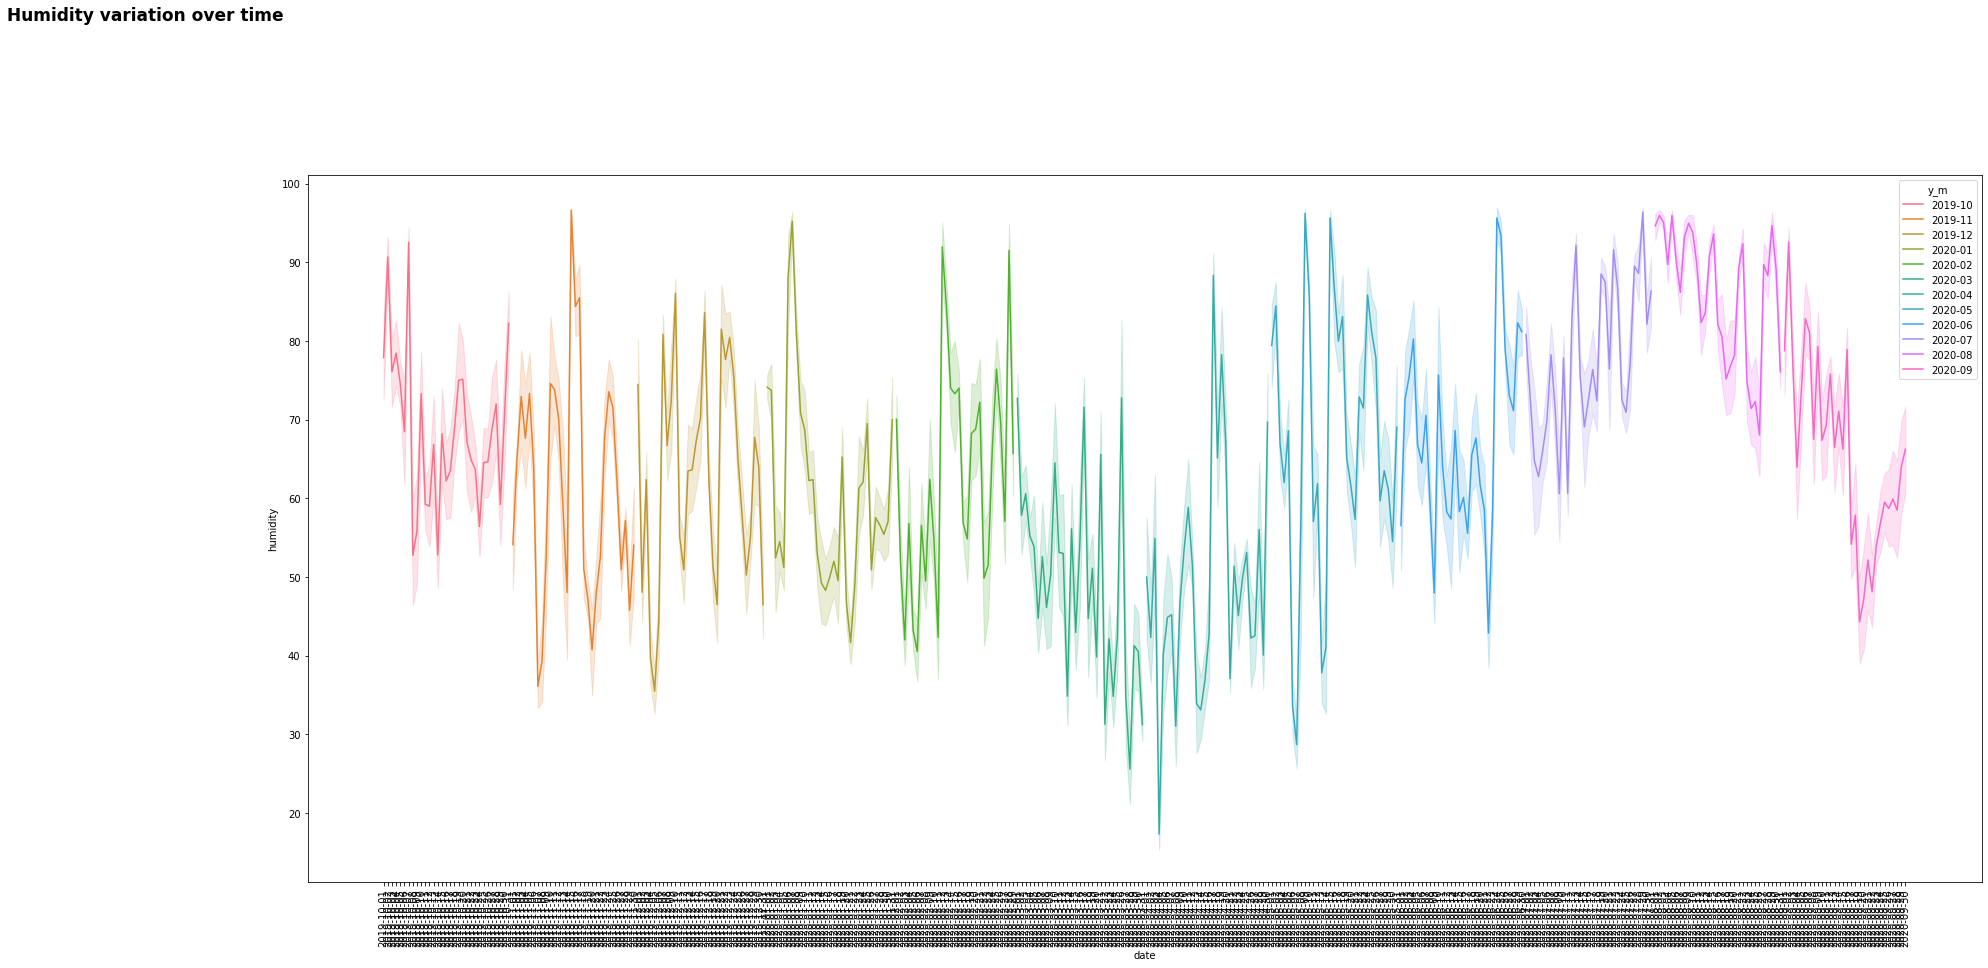

In [29]:
plt.figure(figsize=(30, 13))
plt.suptitle('Humidity variation over time',
             fontsize=17,
             fontweight='bold',
             x=.05,
             y=1.06,
             ha='center'  # Horizontal aligment
             )
plt.xticks(rotation=90)
sns.lineplot(x=df['date'], y=df['humidity'], data=df, hue='y_m')

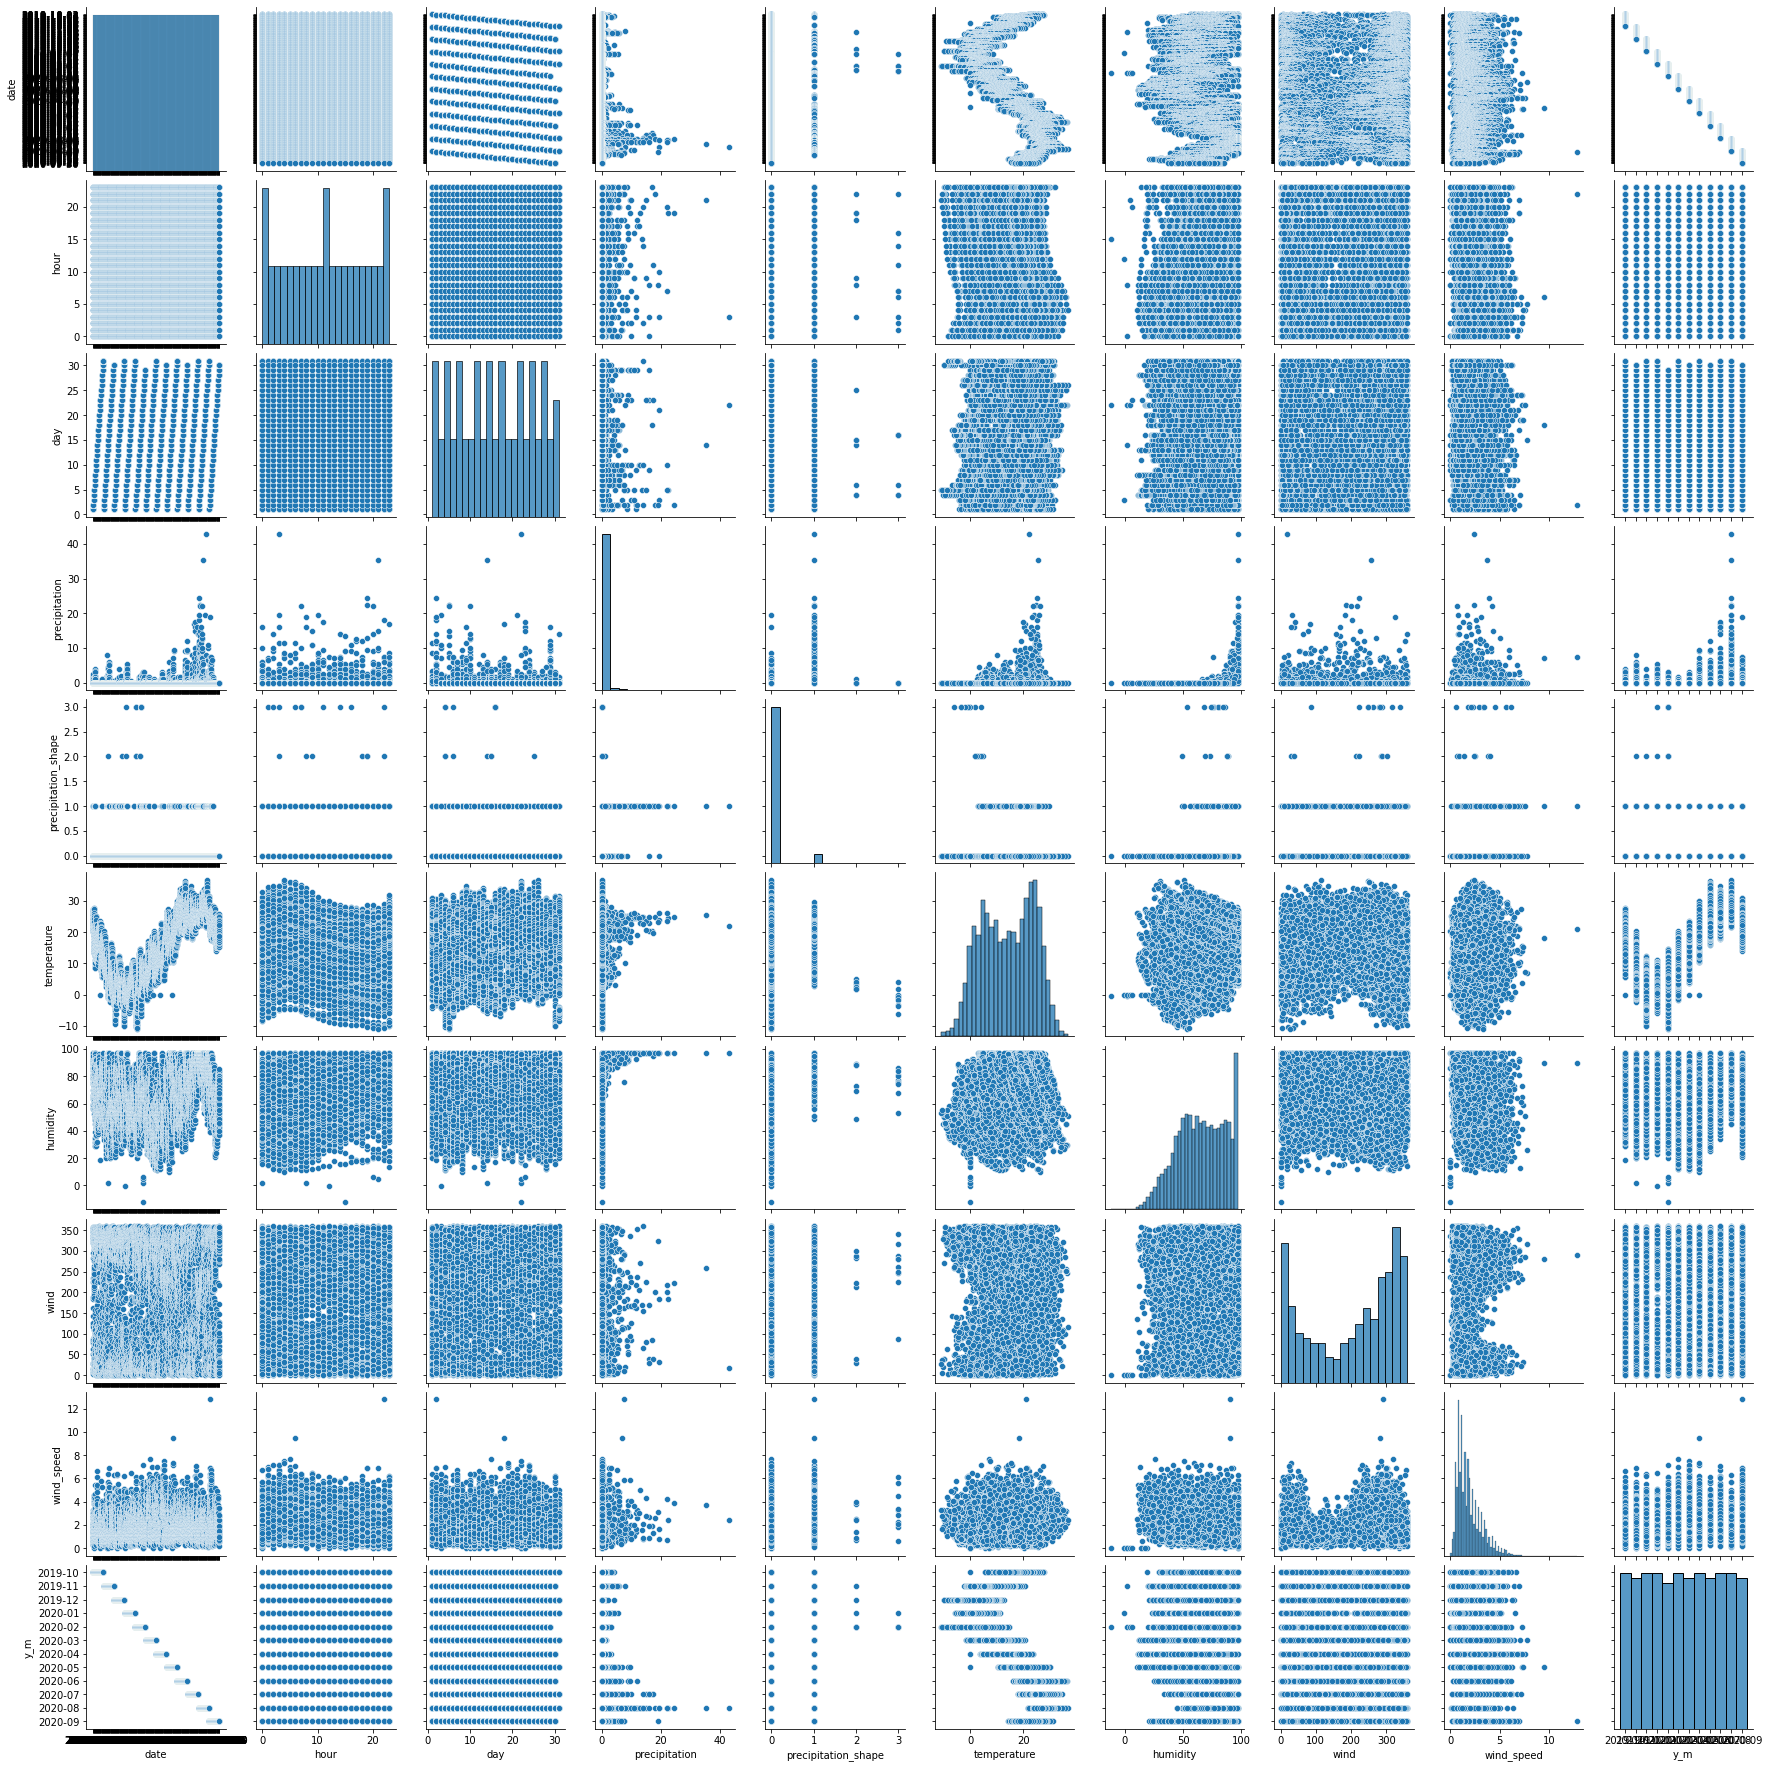

In [30]:
sns.pairplot(df,
             x_vars=df.columns,
             y_vars=df.columns)
plt.show()

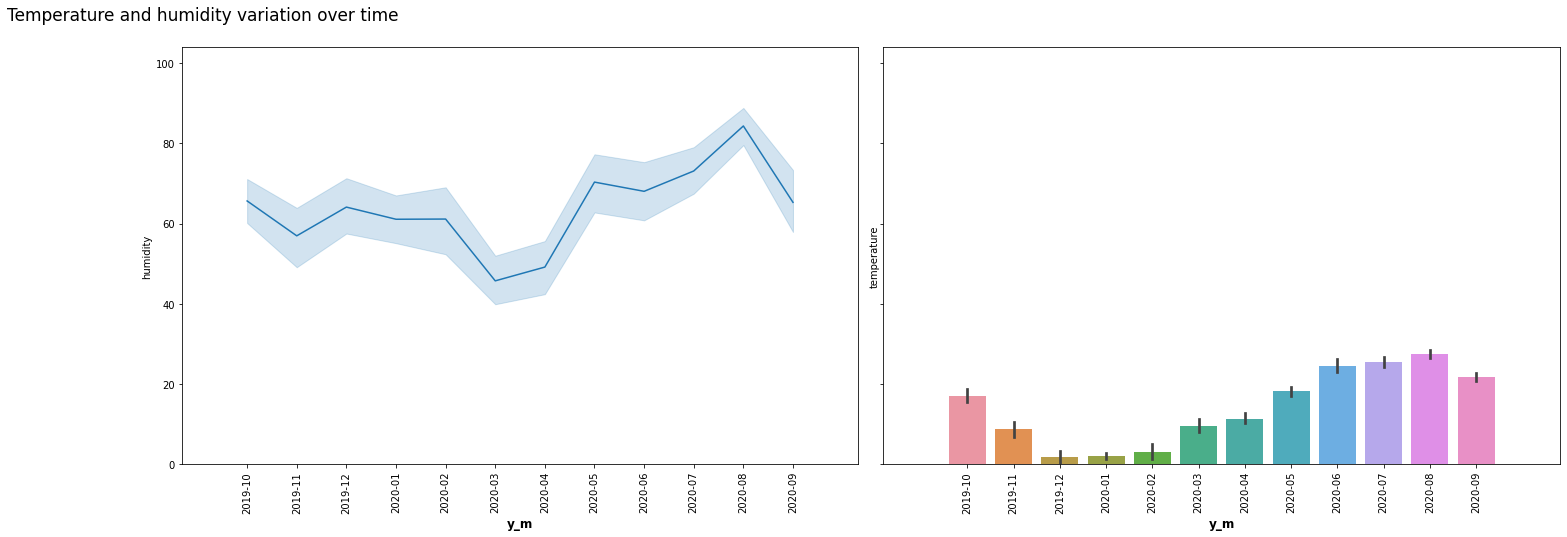

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=True)

sns.lineplot(x='y_m',
            y='humidity',
            data=df.iloc[0::25, :],
            ax=axes[0])

sns.barplot(x='y_m',
            y='temperature',
            data=df.iloc[0::25, :],
            ax=axes[1])

for idx, ax in enumerate(axes):
  ax.margins(.12, .17)
  ax.xaxis.label.set_size(12)
  ax.xaxis.label.set_weight('bold')
  plt.setp(axes[idx].xaxis.get_majorticklabels(), rotation=90)

plt.suptitle('Temperature and humidity variation over time',
             fontsize=17,
             x=.05,
             y=1.06,
             ha='center')

plt.tight_layout()
plt.show()


## 평균 온도

평균 온도: 14도, 평균 습도: 64%
최대 온도: 36.700001, 최대 습도: 97.0
최소 온도: -10.9, 최소 습도: -12.15
중간 온도: 14.5, 중간 습도: 65.0
온도 표준편차: 9.78437155310692, 습도 표준편차: 20.396928063487046


,hour,day,precipitation,temperature,humidity,wind_speed
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,11.500000,15.756831,0.196949,14.082263,64.886152,1.900979
std,6.922581,8.812031,1.323931,9.784929,20.398089,1.218408
min,0.000000,1.000000,0.000000,-10.900000,-12.150000,0.000000
25%,5.750000,8.000000,0.000000,5.700000,50.000000,1.000000
50%,11.500000,16.000000,0.000000,14.500000,65.000000,1.600000
75%,17.250000,23.000000,0.000000,22.700001,82.000000,2.600000
max,23.000000,31.000000,43.000000,36.700001,97.000000,12.800000


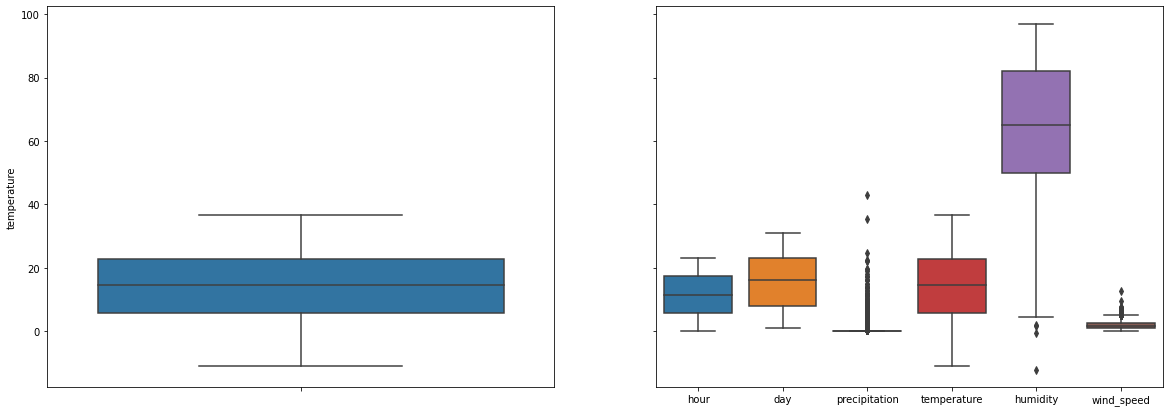

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=True)

df_boxplot = df.copy()
df_boxplot.drop(columns=['wind', 'precipitation_shape'], inplace=True)

sns.boxplot(y=df.temperature, ax=axes[0])
sns.boxplot(data=df_boxplot, ax=axes[1])
print(f'평균 온도: {int(np.mean(df.temperature))}도, 평균 습도: {int(np.mean(df.humidity))}%')
print(f'최대 온도: {np.max(df.temperature)}, 최대 습도: {np.max(df.humidity)}')
print(f'최소 온도: {np.min(df.temperature)}, 최소 습도: {np.min(df.humidity)}')
print(f'중간 온도: {np.median(df.temperature)}, 중간 습도: {np.median(df.humidity)}')
print(f'온도 표준편차: {np.std(df.temperature)}, 습도 표준편차: {np.std(df.humidity)}')
df_boxplot.describe()

## 평균 습도

64.88615237929758

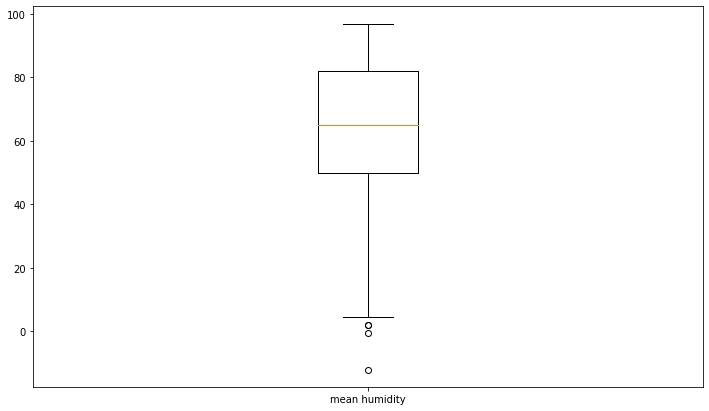

In [33]:
plt.figure(figsize=(12, 7))
plt.boxplot(df.humidity)
plt.xticks([1], ['mean humidity'])
np.mean(df.humidity)

## 기온, 시간과 풍속, 바람 속도, 습도의 상관관계

Text(0.5, 0.98, 'The currelation between temperature and wind speed and day, temperature')

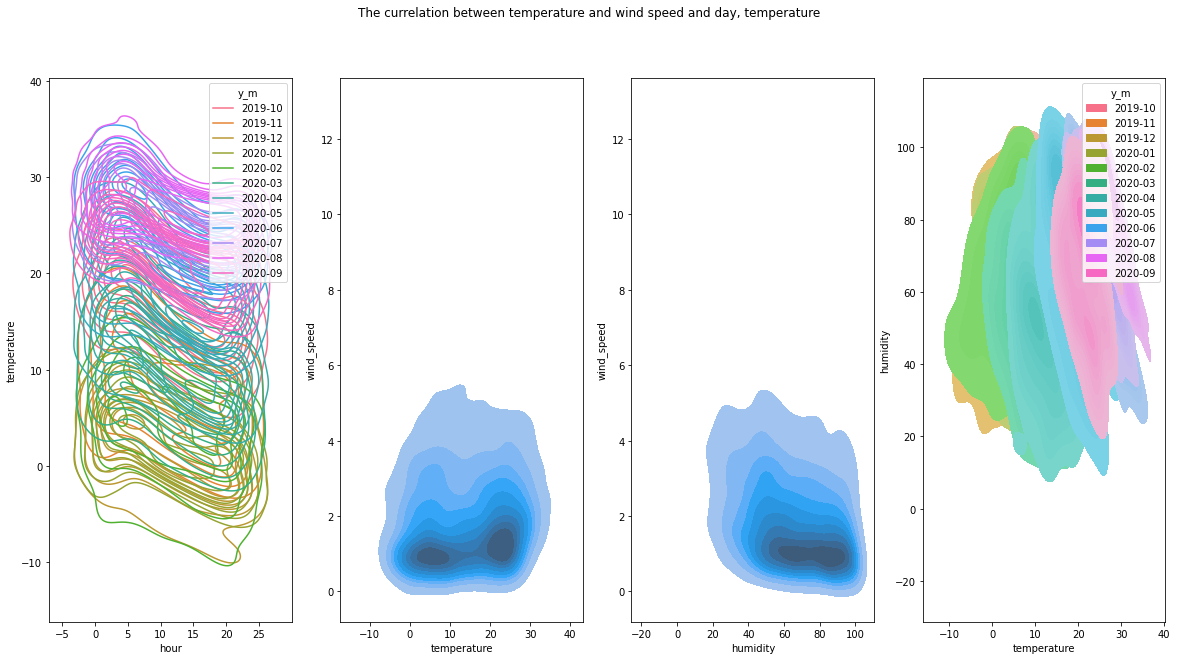

In [34]:
fig, ax = plt.subplots(1, 4, figsize=(20, 10))

sns.kdeplot(x=df['hour'],
            y=df['temperature'],
            data=df,
            # shade=True,
            hue='y_m',
            ax=ax[0])

sns.kdeplot(x=df['temperature'],
            y=df['wind_speed'],
            shade=True,
            ax=ax[1])

sns.kdeplot(x=df['humidity'],
            y=df['wind_speed'],
            shade=True,
            ax=ax[2])

sns.kdeplot(x='temperature',
            y='humidity',
            data=df,
            hue='y_m',
            shade=True,
            ax=ax[3])

plt.suptitle('The currelation between temperature and wind speed and day, temperature')

# 기온 근사치 기준으로 시각화

3072   -10
3071   -10
3074   -10
3050   -10
2184   -10
        ..
7934    36
6372    36
7910    36
7911    36
7912    36
Name: temperature, Length: 8784, dtype: int64


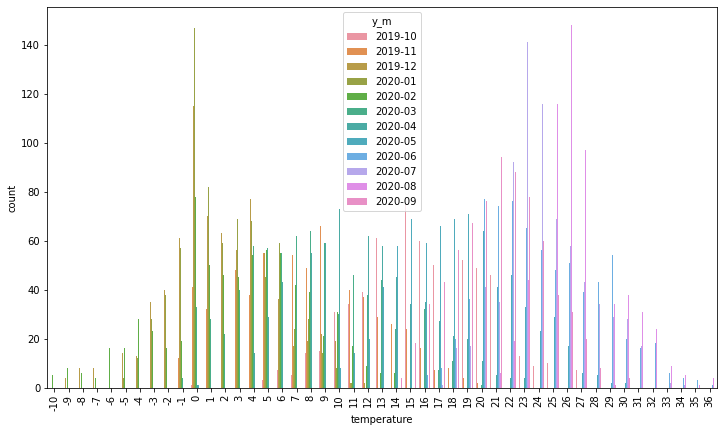

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

plt.xticks(rotation=90)
sns.countplot(x=df.temperature.astype(np.int).sort_values(), data=df, ax=ax, hue='y_m')
print(df.temperature.astype(np.int).sort_values())

([<matplotlib.patches.Wedge at 0x7fd5f2c61390>,
 [Text(1.0991078979654665, 0.04429253469755326, '0.0'),
  Text(1.09197976129897, 0.13259035000121513, '0.1'),
  Text(1.0777697166687552, 0.22002826598360314, '0.2'),
  Text(1.056569921669494, 0.3060392141921024, '0.3'),
  Text(1.0285178651103706, 0.39006538060792534, '0.4'),
  Text(0.9937954753473726, 0.4715618232841691, '0.5'),
  Text(0.9526279404080594, 0.5500000065035444, '0.6'),
  Text(0.9052822475607546, 0.6248712285354071, '0.7'),
  Text(0.8520654517996127, 0.6956899207617732, '0.8'),
  Text(0.7933226844751051, 0.7619967967762153, '0.9'),
  Text(0.7294349149847157, 0.8233618310325301, '1.0'),
  Text(0.6608164800401428, 0.8793870477254915, '1.1'),
  Text(0.5879123965346611, 0.9297091018167304, '1.2'),
  Text(0.5111954754377256, 0.9740016354667983, '1.3'),
  Text(0.4311632554343225, 1.011977394591044, '1.4'),
  Text(0.34833477619559183, 1.0433900918126293, '1.5'),
  Text(0.26324721220730035, 1.068036003730719, '1.6'),
  Text(0.1764523

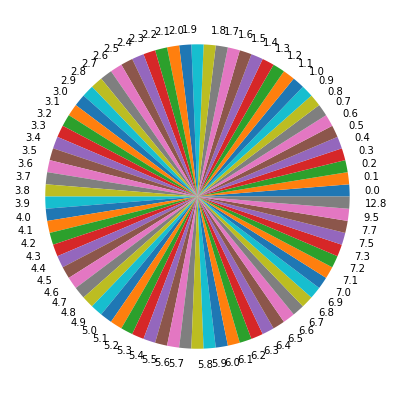

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
# plt.pie(df.wind_speed.sort_values().astype(np.int).unique(), labels=df.wind_speed.sort_values().astype(np.int).unique())
u_cnt = df.wind_speed.unique()
x, cnt = np.unique(u_cnt, return_counts=True)
plt.pie(cnt, labels=x)


([<matplotlib.patches.Wedge at 0x7fd5f3014dd8>,
 [Text(1.0119773781913737, 0.4311632939257627, '0'),
  Text(0.39006530537605544, 1.0285178936420527, '1'),
  Text(-0.47156193086842774, 0.9937954242979993, '2'),
  Text(-1.0433901417519724, 0.34833462660895365, '3'),
  Text(-0.9740015232912095, -0.5111956891704035, '4'),
  Text(-0.3060389452446007, -1.0565699995710518, '5'),
  Text(0.5500002824396149, -0.9526277810962391, '6'),
  Text(1.0119775295728899, -0.4311629386201356, '7'),
  Text(1.0919798062996733, -0.1325899793865593, '9'),
  Text(1.0991079129981562, -0.04429216166363364, '12')])

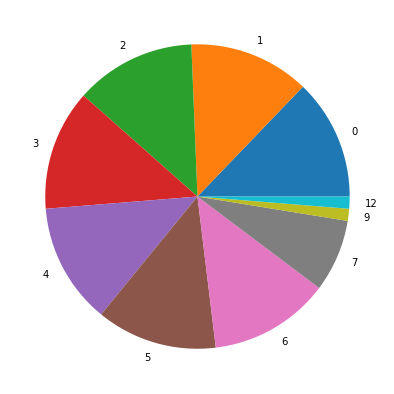

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
u_cnt = df.wind_speed.unique().astype(np.int)
x, cnt = np.unique(u_cnt, return_counts=True)
plt.pie(cnt, labels=x)


## 시간과 기온

## 기온과 습도와 풍속의 변화 시각화

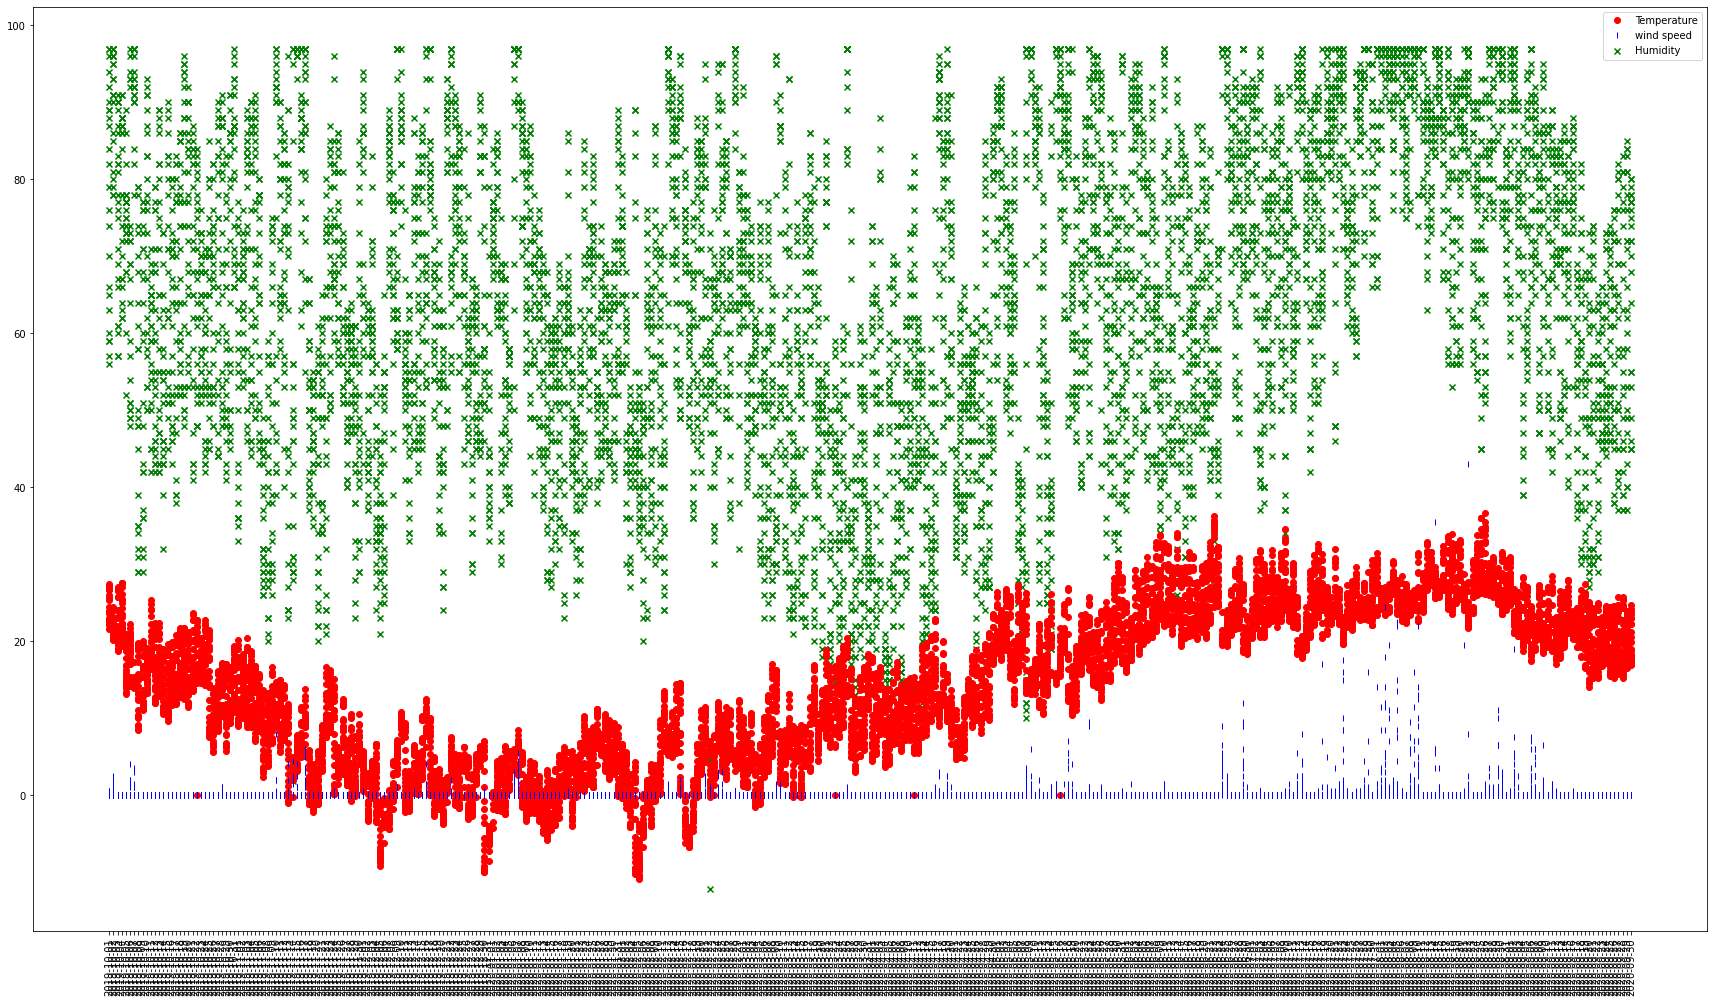

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(30, 17))

# ax.bar(df['date'], df['humidity'], color='green', label='Humidity')
# ax.plot_date(df['date'], df['temperature'], color='red', label='Temperature')
# ax.plot_date(df['date'], df['precipitation'], color='blue', label='wind speed')

ax.scatter(df['date'], df['humidity'], color='green', label='Humidity', marker='x')
ax.plot_date(df['date'], df['temperature'], color='red', label='Temperature', marker='o')
ax.plot_date(df['date'], df['precipitation'], color='blue', label='wind speed', marker='|')

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
ax.legend()
# plt.gcf().autofmt_xdate()
plt.show()

- 10월 초, 11월 초, 1월 초, 5월 중순까지는 바람의 세기가 5ms 정도로 관측 됨.
- 6월 말에서 8월까지 10ms 풍속이 넘는 현상 관측
- 8월에 35ms 이상, 40ms가 넘는 풍속은 태풍으로 볼 수 있음.

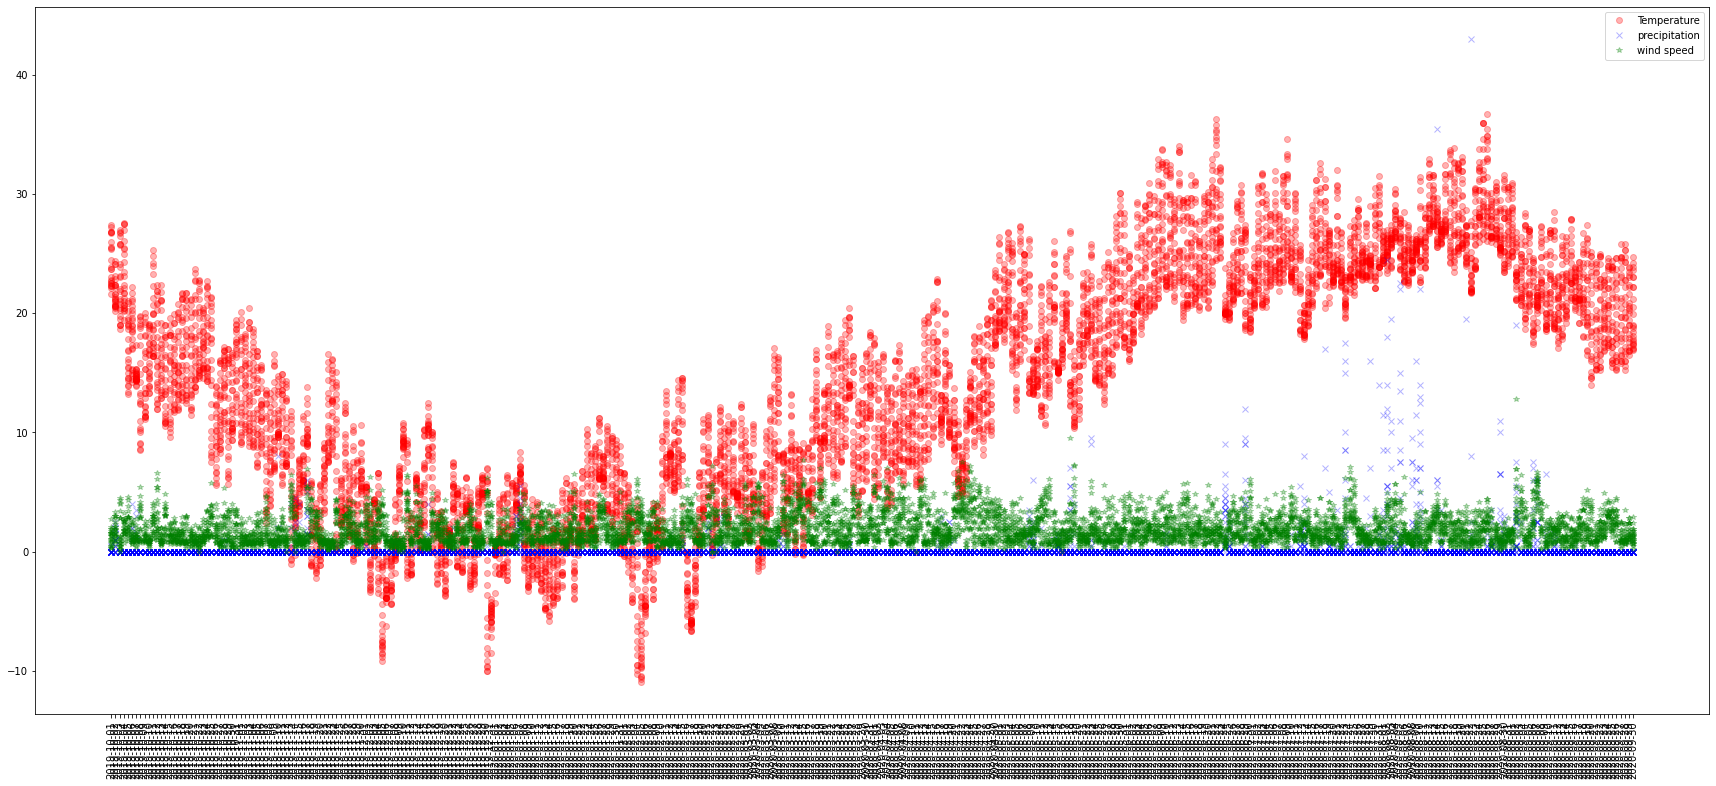

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(30, 13))

ax.plot_date(df['date'], df['temperature'], color='red', label='Temperature', marker='o', alpha=.3)
ax.plot_date(df['date'], df['precipitation'], color='blue', label='precipitation', marker='x', alpha=.3)
ax.plot_date(df['date'], df['wind_speed'], color='green', label='wind speed', marker='*', alpha=.3)

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
ax.legend()
plt.show()